In [1]:
with open("input17.dat", "r") as file:
    lossmap = file.readlines()
lossmap = [list(map(int,line.removesuffix("\n"))) for line in lossmap]
max_v, max_h = len(lossmap), len(lossmap[0])
# lossmap = {(i,j) : lossmap[i][j] for i in range(max_v) for j in range(max_h)} #makes it ~11% slower 

In [14]:
#Dijkstra's algorithm
import heapq

def create_unvisited(initial_point, max_v, max_h, step_range=range(1,4), with_out_of_border=False):
    if with_out_of_border:
        unvisited = {((i,j),direc,n_steps) for i in range(max_v) for j in range(max_h) for direc in range(4) for n_steps in step_range if (i,j)!= initial_point[0]}
        unvisited.add(initial_point)
        return unvisited
    unvisited = {((i,j),direc,n_steps) for i in range(1,max_v-1) for j in range(1,max_h-1) for direc in range(4) for n_steps in step_range}
    unvisited.update({((   0   ,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,2,3] for n_steps in step_range})
    unvisited.update({((max_v-1,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,1,2] for n_steps in step_range})
    unvisited.update({((i,   0   ),direc,n_steps) for i in range(1,max_v-1) for direc in [1,2,3] for n_steps in step_range})
    unvisited.update({((i,max_h-1),direc,n_steps) for i in range(1,max_v-1) for direc in [0,1,3] for n_steps in step_range})
    unvisited.update({((0,max_h-1),direc,n_steps) for direc in [0,3] for n_steps in step_range})
    unvisited.update({((max_v-1,0),direc,n_steps) for direc in [1,2] for n_steps in step_range})
    unvisited.update({((max_v-1,max_h-1),direc,n_steps) for direc in [0,1] for n_steps in step_range})
    unvisited.add(initial_point)
    return unvisited

inf = 10**5 #10**5 playing role of infinity
delta = {0: (0,1), 1: (1,0), 2: (0,-1), 3: (-1,0)}

initial_point = ((0,0),0,0)

unvisited = create_unvisited(initial_point, max_v, max_h)
tent_dist = {item:inf for item in unvisited}
tent_dist.update({initial_point: 0})
seen = [] #(dist[point],point) for set of points that have not been visited, but seen (neighbors have been visited)
#using heap priority queue (heapq) on this set

dist_curr, current = 0, initial_point

while current[0]!=(max_v-1, max_h-1):
    next_dirs = set(range(4))
    next_dirs.remove((current[1]+2)%4)
    if current[2]==3:
          next_dirs.remove(current[1])
    successors = {(tuple(map(sum,zip(current[0],delta[direc]))),)+(direc, current[2]+1 if direc==current[1] else 1) for direc in next_dirs}
    successors = {point for point in successors if point[0][0] in range(max_v) and point[0][1] in range(max_h) and point in unvisited}
    for neighbor in successors:
            new_dist = dist_curr + lossmap[neighbor[0][0]][neighbor[0][1]]
            if new_dist < tent_dist[neighbor]:
                tent_dist[neighbor] = new_dist
                heapq.heappush(seen, (new_dist, neighbor)) #this version of seen even faster
    unvisited.remove(current)
    dist_curr, current = heapq.heappop(seen) #this search MUCH faster with seen instead of all unvisited
    # print("\r"+str(len(unvisited)), end="            ")
    
min({tent_dist[k] for k in tent_dist if k[0]==(max_v-1, max_h-1)})

1023

In [9]:
#Dijkstra's algorithm, no import of heapq package
# import heapq

inf = 10**5 #10**5 playing role of infinity
delta = {0: (0,1), 1: (1,0), 2: (0,-1), 3: (-1,0)}

initial_point = ((0,0),0,0)
# unvisited = {((i,j),direc,n_steps) for i in range(max_v) for j in range(max_h) for direc in range(4) for n_steps in range(1,4) if (i,j)!= initial_point[0]}
unvisited = {((i,j),direc,n_steps) for i in range(1,max_v-1) for j in range(1,max_h-1) for direc in range(4) for n_steps in range(1,4)}
unvisited.update({((   0   ,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,2,3] for n_steps in range(1,4)})
unvisited.update({((max_v-1,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,1,2] for n_steps in range(1,4)})
unvisited.update({((i,   0   ),direc,n_steps) for i in range(1,max_v-1) for direc in [1,2,3] for n_steps in range(1,4)})
unvisited.update({((i,max_h-1),direc,n_steps) for i in range(1,max_v-1) for direc in [0,1,3] for n_steps in range(1,4)})
unvisited.update({((0,max_h-1),direc,n_steps) for direc in [0,3] for n_steps in range(1,4)})
unvisited.update({((max_v-1,0),direc,n_steps) for direc in [1,2] for n_steps in range(1,4)})
unvisited.update({((max_v-1,max_h-1),direc,n_steps) for direc in [0,1] for n_steps in range(1,4)})
unvisited.add(initial_point)
tent_dist = {item:inf for item in unvisited}
tent_dist.update({initial_point: 0})
seen = [(0, initial_point)] #(dist[point],point) for set of points that have not been visited, but seen (neighbors have been visited)
#using heap priority queue (heapq) on this set

dist_curr, current = 0, initial_point

while current[0]!=(max_v-1, max_h-1):
    # dist_curr, current = heapq.heappop(seen)
    next_dirs = set(range(4))
    next_dirs.remove((current[1]+2)%4)
    if current[2]==3:
          next_dirs.remove(current[1])
    successors = {(tuple(map(sum,zip(current[0],delta[direc]))),)+(direc, current[2]+1 if direc==current[1] else 1) for direc in next_dirs}
    successors = {point for point in successors if point[0][0] in range(max_v) and point[0][1] in range(max_h) and point in unvisited}
    for neighbor in successors:
            new_dist = dist_curr + lossmap[neighbor[0][0]][neighbor[0][1]]
            if new_dist < tent_dist[neighbor]:
                tent_dist[neighbor] = new_dist
                seen.append((new_dist, neighbor)) #this version of seen even faster
    unvisited.remove(current)
    seen.remove((dist_curr,current))
    dist_curr, current = min(seen) #this search MUCH faster with seen instead of all unvisited
    # print("\r"+str(len(unvisited)), end="            ")
    
min({tent_dist[k] for k in tent_dist if k[0]==(max_v-1, max_h-1)})

1023

78

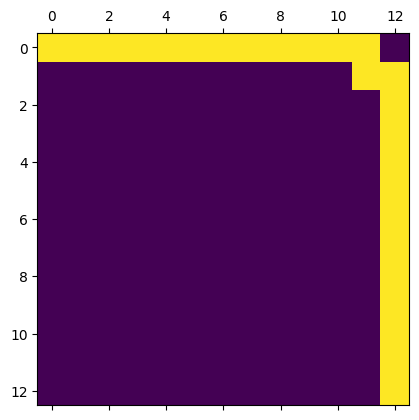

In [16]:
#Dijkstra's algorithm! Simple version, no 3-block restriction
import numpy as np
np.set_printoptions(linewidth=np.inf)
lossmap = np.genfromtxt("exampleinput17.dat", int, delimiter=1)

tent_dist = 10**10*np.ones(lossmap.shape, int) #10**10 playing role of infinity
unvisited = {(i,j) for i in range(lossmap.shape[0]) for j in range(lossmap.shape[1])}

initial_point = (0,0)
tent_dist[initial_point] = 0
# unvisited.remove(initial_point)
current = initial_point

# while (lossmap.shape[0]-1, lossmap.shape[1]-1) in unvisited:
while current!=(lossmap.shape[0]-1, lossmap.shape[1]-1):
    unv_neighbors = [tuple(map(sum,zip(current,delta))) for delta in [(0,1), (1,0), (0,-1), (-1,0)]]
    unv_neighbors = [point for point in unv_neighbors if point[0] in range(lossmap.shape[0]) and point[1] in range(lossmap.shape[1]) and point in unvisited]
    for neighbor in unv_neighbors:
            new_dist = tent_dist[current] + lossmap[neighbor]
            if new_dist < tent_dist[neighbor]:
                tent_dist[neighbor] = new_dist
    unvisited.remove(current)
    current = min([(tent_dist[point], point) for point in unvisited])[1] #min([(point, tent_dist[point]) for point in unvisited], key=lambda x:x[1])[0]
import matplotlib.pyplot as plt
# tent_dist
current = (lossmap.shape[0]-1, lossmap.shape[1]-1)
min_path = np.zeros(lossmap.shape, bool)
while current!=(0,0):
    min_path[current] = True
    neighbors = [tuple(map(sum,zip(current,delta))) for delta in [(0,1), (1,0), (0,-1), (-1,0)]]
    neighbors = [point for point in neighbors if point[0] in range(lossmap.shape[0]) and point[1] in range(lossmap.shape[1])]
    current = min([(tent_dist[point], point) for point in neighbors])[1]
min_path[current] = True
plt.matshow(min_path);
tent_dist[-1,-1]

In [29]:
with open("input17.dat", "r") as file:
    lossmap = file.readlines()
lossmap = [list(map(int,line.removesuffix("\n"))) for line in lossmap]
max_v, max_h = len(lossmap), len(lossmap[0])
# lossmap = {(i,j) : lossmap[i][j] for i in range(max_v) for j in range(max_h)} #makes it ~11% slower 

In [31]:
#Dijkstra's algorithm
import heapq

def create_unvisited(max_v, max_h, include_initial=True, initial_point=((0,0),0,0), step_range=range(4,11), with_out_of_border=False):
    if with_out_of_border:
        unvisited = {((i,j),direc,n_steps) for i in range(max_v) for j in range(max_h) for direc in range(4) for n_steps in step_range if (i,j)!= initial_point[0]}
    else:
        unvisited = {((i,j),direc,n_steps) for i in range(1,max_v-1) for j in range(1,max_h-1) for direc in range(4) for n_steps in step_range}
        unvisited.update({((   0   ,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,2,3] for n_steps in step_range})
        unvisited.update({((max_v-1,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,1,2] for n_steps in step_range})
        unvisited.update({((i,   0   ),direc,n_steps) for i in range(1,max_v-1) for direc in [1,2,3] for n_steps in step_range})
        unvisited.update({((i,max_h-1),direc,n_steps) for i in range(1,max_v-1) for direc in [0,1,3] for n_steps in step_range})
        unvisited.update({((0,max_h-1),direc,n_steps) for direc in [0,3] for n_steps in step_range})
        unvisited.update({((max_v-1,0),direc,n_steps) for direc in [1,2] for n_steps in step_range})
        unvisited.update({((max_v-1,max_h-1),direc,n_steps) for direc in [0,1] for n_steps in step_range})
    if include_initial:
        unvisited.add(initial_point)
    return unvisited

inf = 10**5 #10**5 playing role of infinity
delta  = {0: (0,1), 1: (1,0), 2: (0,-1), 3: (-1,0)}
delta4 = {0: (0,4), 1: (4,0), 2: (0,-4), 3: (-4,0)}

initial_point = ((0,0),0,0)

unvisited = create_unvisited(max_v, max_h, include_initial=False)
tent_dist = {item:inf for item in unvisited}
tent_dist.update({initial_point: 0})
seen = [] #(dist[point],point) for set of points that have not been visited, but seen (neighbors have been visited)
#using heap priority queue (heapq) on this set

dist_curr, current = 0, initial_point

other_dirs = {0,1} #custom-made for first step because steps allowed are different (+4 in 0,1, nothing else)
successors = {(tuple(map(sum,zip(current[0],delta4[direc]))),)+(direc, 4) for direc in other_dirs}    
for neighbor in successors:
        mid_point = tuple(map(sum,zip(current[0],delta[neighbor[1]])))
        new_dist = dist_curr  + lossmap[mid_point[0]][mid_point[1]]
        for _ in range(3):
            mid_point = tuple(map(sum,zip(mid_point,delta[neighbor[1]])))
            new_dist += lossmap[mid_point[0]][mid_point[1]]
        if new_dist < tent_dist[neighbor]:
            tent_dist[neighbor] = new_dist
            heapq.heappush(seen, (new_dist, neighbor)) #this version of seen even faster
            
dist_curr, current = heapq.heappop(seen) 
while current[0]!=(max_v-1, max_h-1):
    successors = {(tuple(map(sum,zip(current[0],delta4[direc]))),)+(direc, 4) for direc in {(current[1]+1)%4, (current[1]+3)%4}}#other directions
    if current[2]!=10:#same direc
        successors.add((tuple(map(sum,zip(current[0],delta[current[1]]))),)+(current[1], current[2]+1))      
    successors = {point for point in successors if point[0][0] in range(max_v) and point[0][1] in range(max_h) and point in unvisited}
    for neighbor in successors:
            new_dist = dist_curr + lossmap[neighbor[0][0]][neighbor[0][1]]
            if neighbor[-1]==4:
                 mid_point = current[0]
                 for _ in range(3):
                    mid_point = tuple(map(sum,zip(mid_point,delta[neighbor[1]])))
                    new_dist += lossmap[mid_point[0]][mid_point[1]]
            if new_dist < tent_dist[neighbor]:
                tent_dist[neighbor] = new_dist
                heapq.heappush(seen, (new_dist, neighbor)) #this version of seen even faster
    unvisited.remove(current)
    dist_curr, current = heapq.heappop(seen) #this search MUCH faster with seen instead of all unvisited
    # print("\r"+str(len(unvisited)), end="            ")
    
min({tent_dist[k] for k in tent_dist if k[0]==(max_v-1, max_h-1)})

1165